# K-Nearest Neighbors and K-Mean From [AIO Course](https://www.facebook.com/aivietnam.edu.vn/)
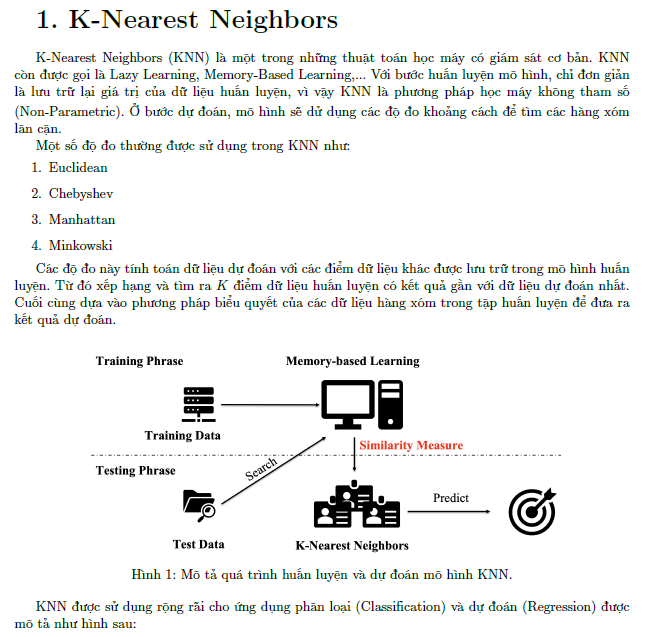
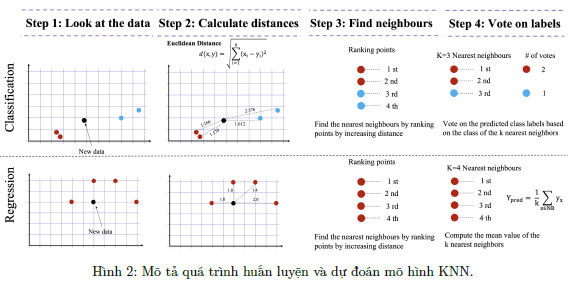

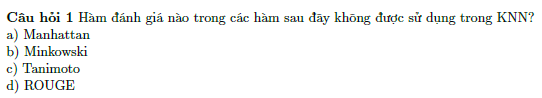 <br>
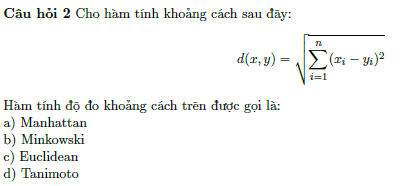

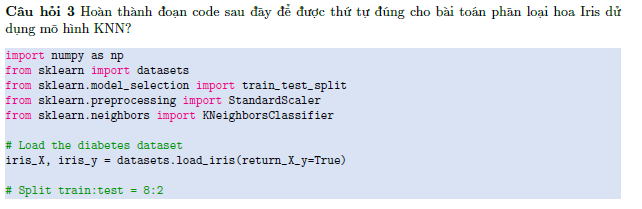
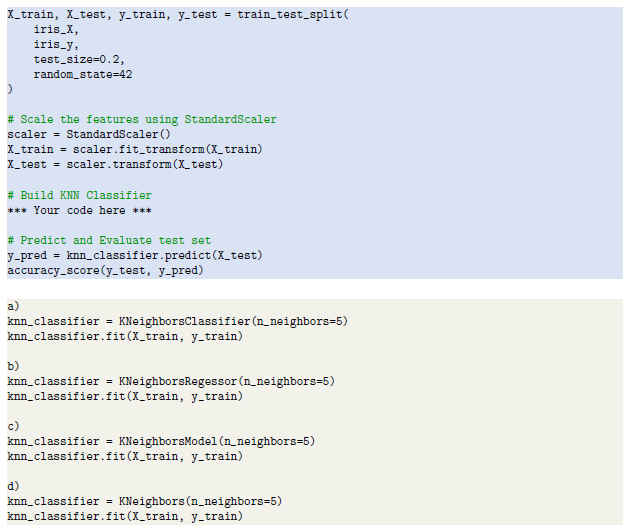

In [5]:
# Question 3
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

iris_X, iris_Y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train,y_train)

y_pred = knn_classifier.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

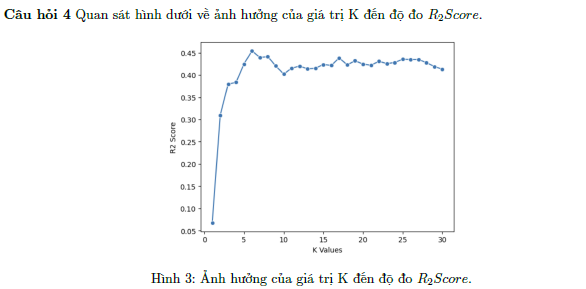
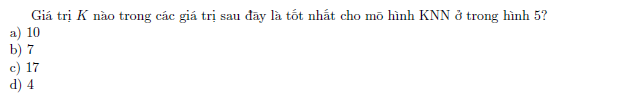
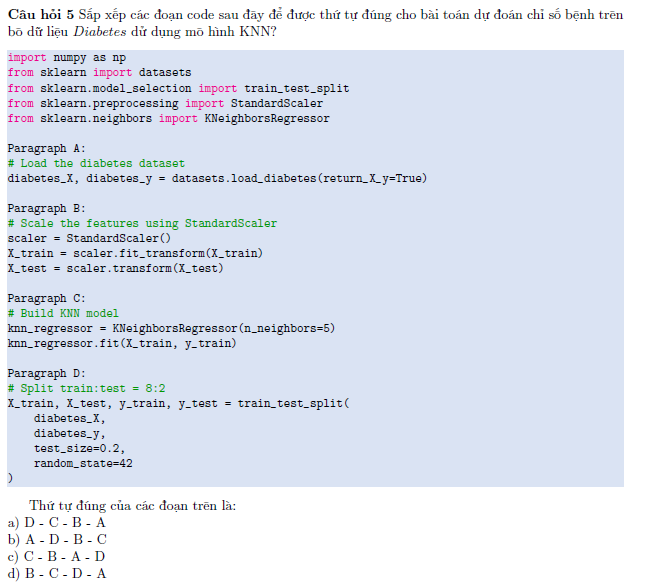
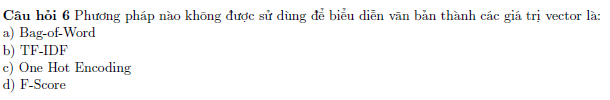
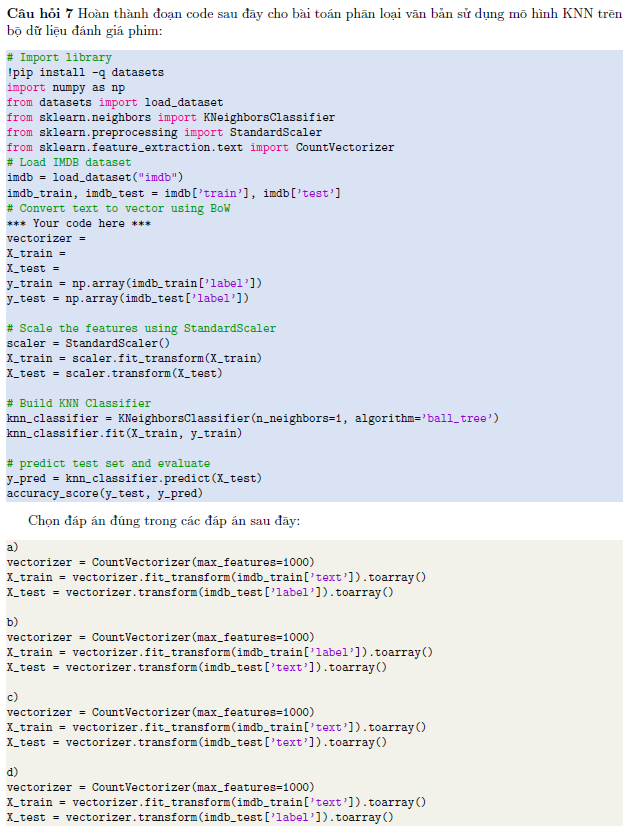

In [26]:
# 1: D, 2: C, 3: A, 4: B, 5: B, 6: D, 7: C, 

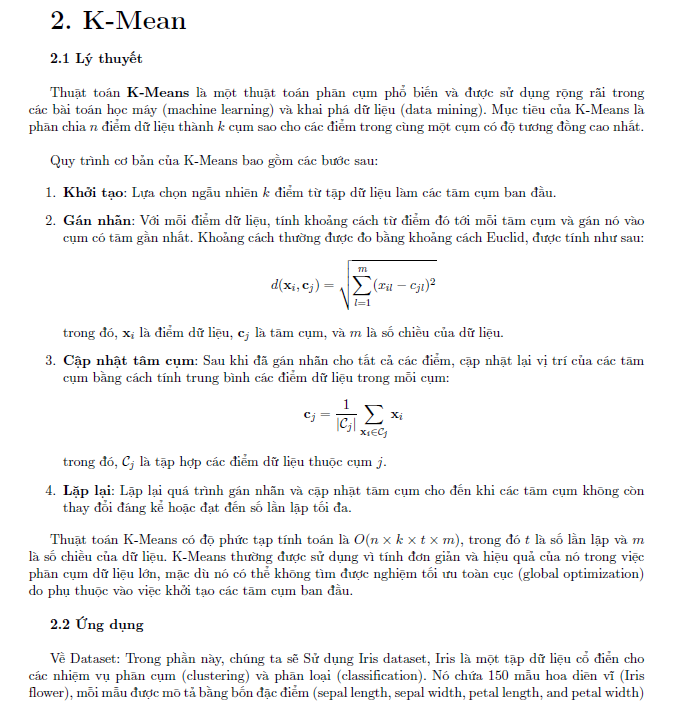
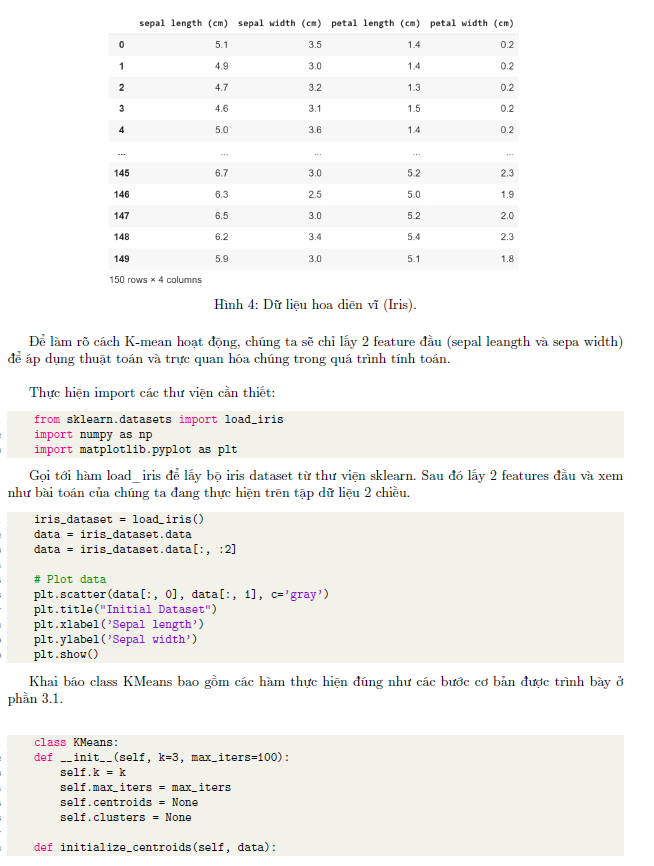
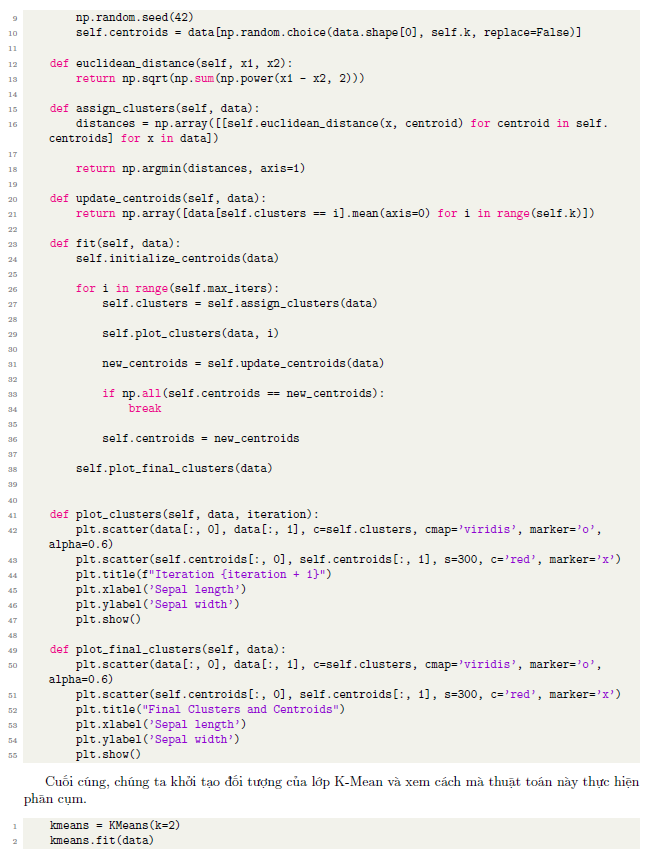
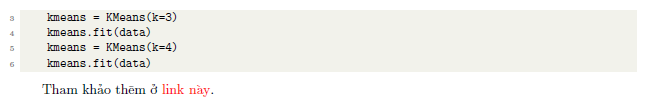
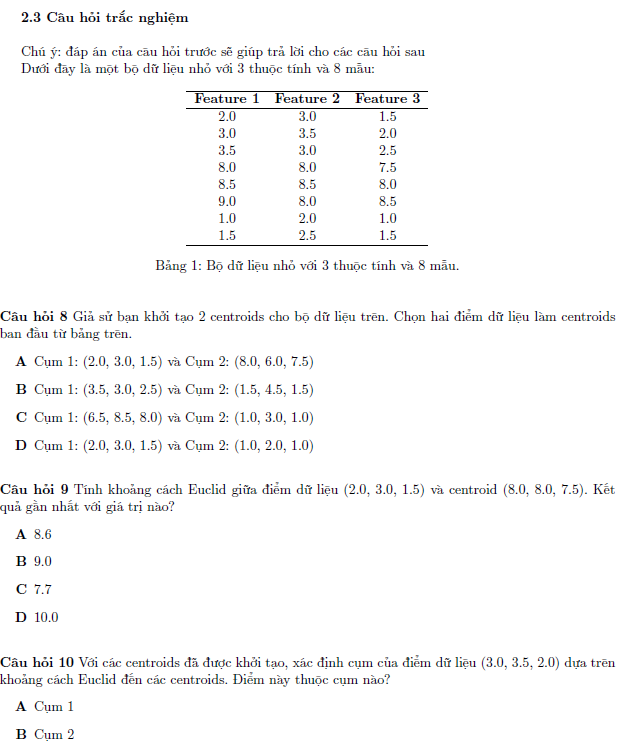
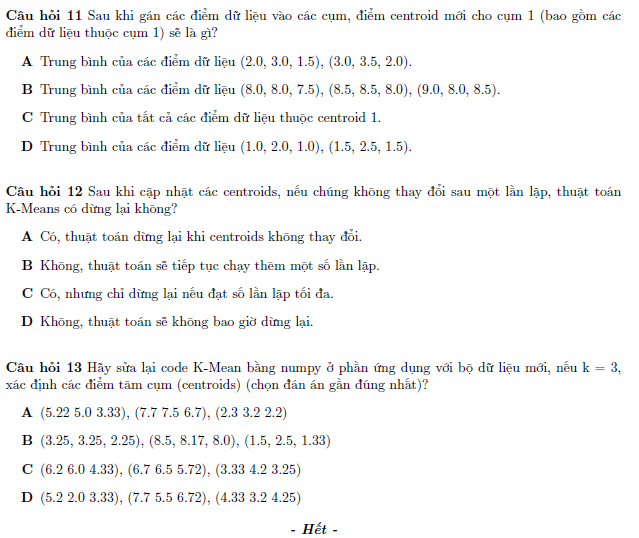

In [2]:
!pip install scikit-learn numpy matplotlib

  Using cached scikit_learn-1.5.2-cp310-cp310-win_amd64.whl.metadata (13 kB)
  Using cached numpy-2.1.1-cp310-cp310-win_amd64.whl.metadata (59 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-win_amd64.whl (11.0 MB)
Using cached numpy-2.1.1-cp310-cp310-win_amd64.whl (12.9 MB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------------ --------------------------- 2.4/7.8 MB 12.2 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/7.8 MB 12.7 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 12.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 11.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   -------------------------------- ------- 2.1/2.6 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 9.8 MB/s

In [3]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

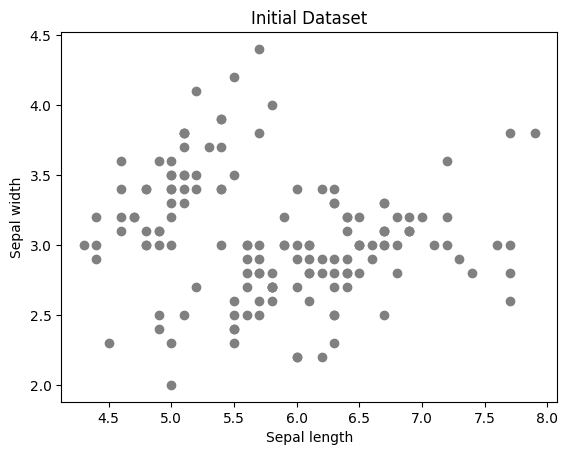

In [13]:
iris_dataset = load_iris()
data = iris_dataset.data
data = iris_dataset.data[:, :2]

plt.scatter(data[:, 0], data[:, 1], c='gray')
plt.title("Initial Dataset")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [6]:
class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.clusters = None

    def initialize_centroids(self, data):
        np.random.seed(42)
        self.centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum(np.power(x1 - x2, 2)))

    def assign_clusters(self, data):
        distances = np.array([[self.euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])
        return np.argmin(distances, axis=1)
        
    def update_centroids(self, data):
        return np.array([data[self.clusters == i].mean(axis=0) for i in range(self.k)])
        
    def fit(self, data):
        self.initialize_centroids(data)
        for i in range(self.max_iters):
            self.clusters = self.assign_clusters(data)

            self.plot_clusters(data, i)

            new_centroids = self.update_centroids(data)

            if np.all(self.centroids == new_centroids):
                break
            
            self.centroids = new_centroids

        self.plot_final_clusters(data)

    def plot_clusters(self, data, iteration):
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title(f"Iteration {iteration + 1}")
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

    def plot_final_clusters(self, data):
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title("Final Clusters and Centroids")
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

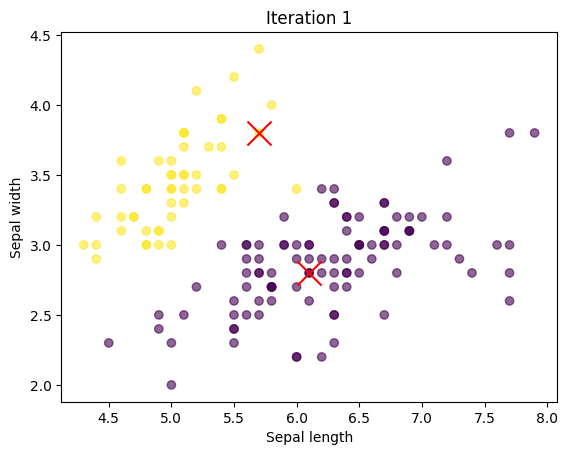

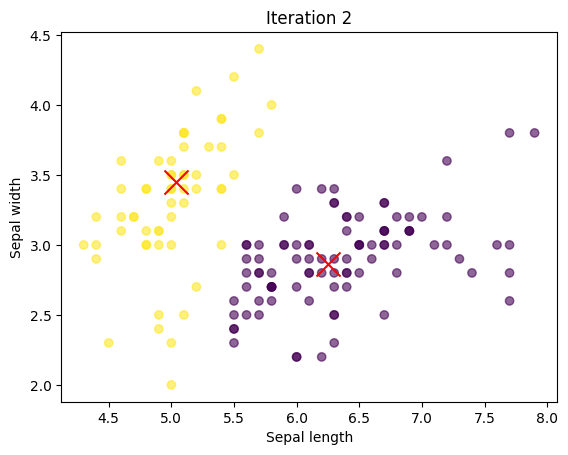

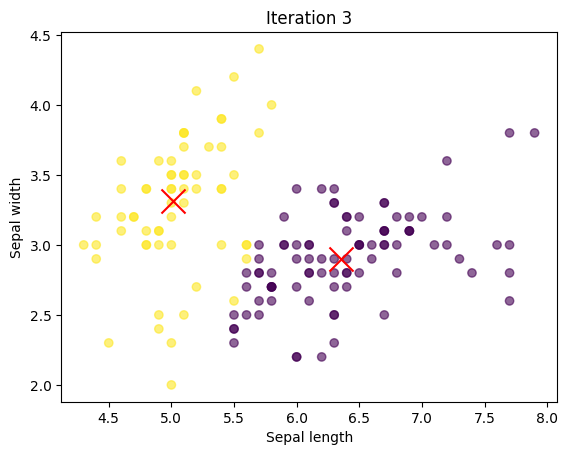

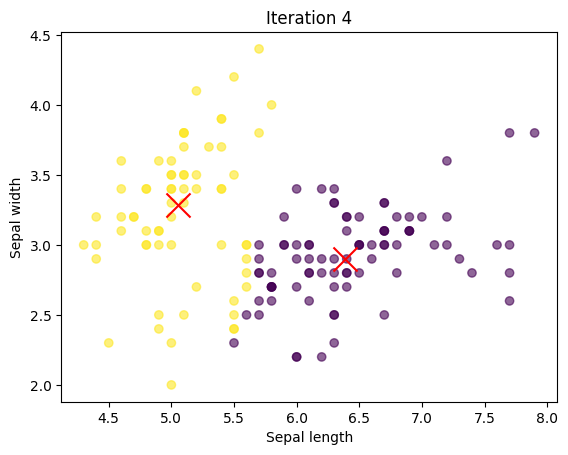

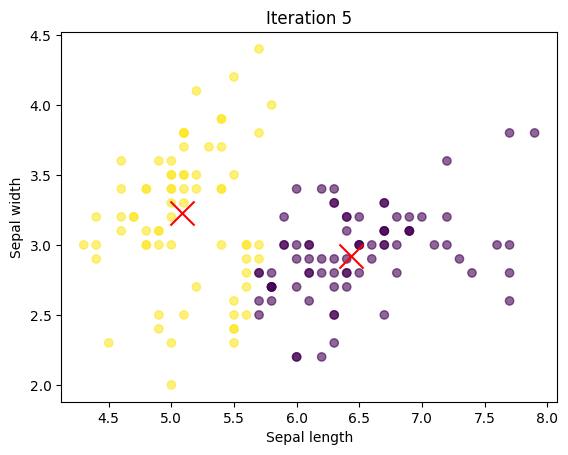

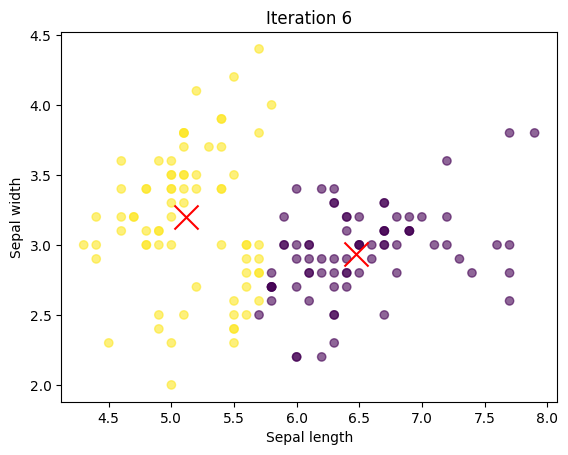

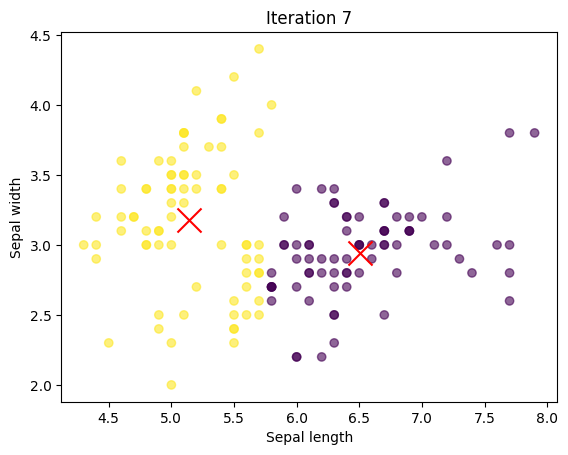

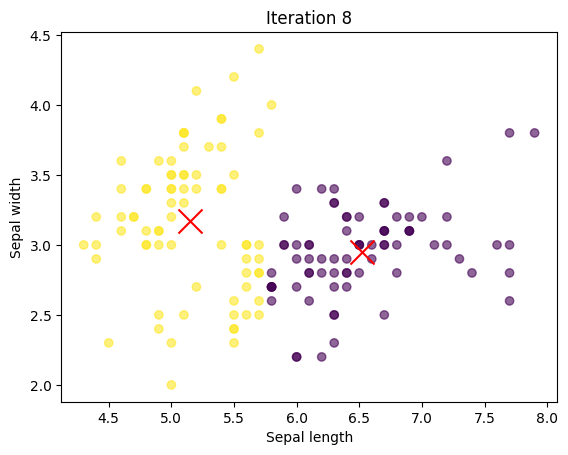

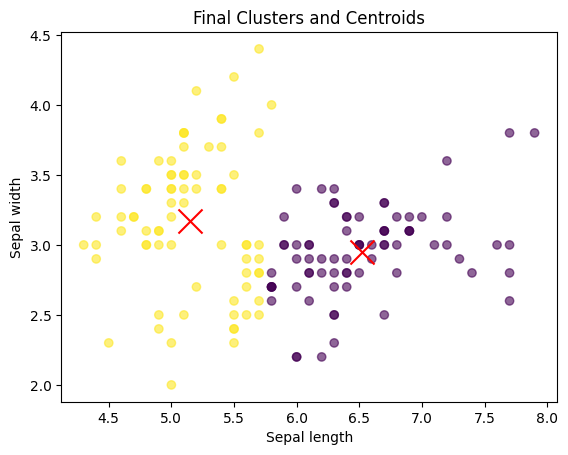

In [7]:
kmeans = KMeans(k=2)
kmeans.fit(data)

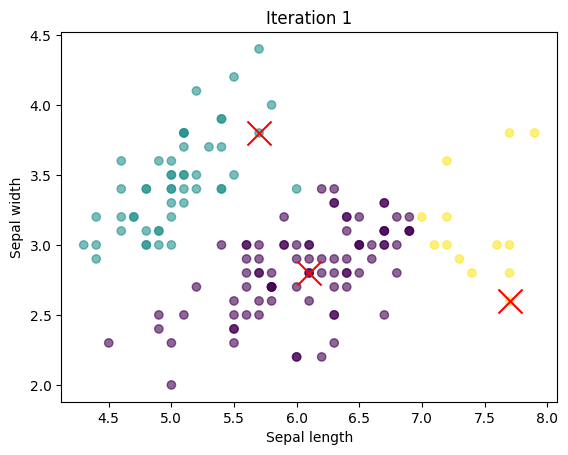

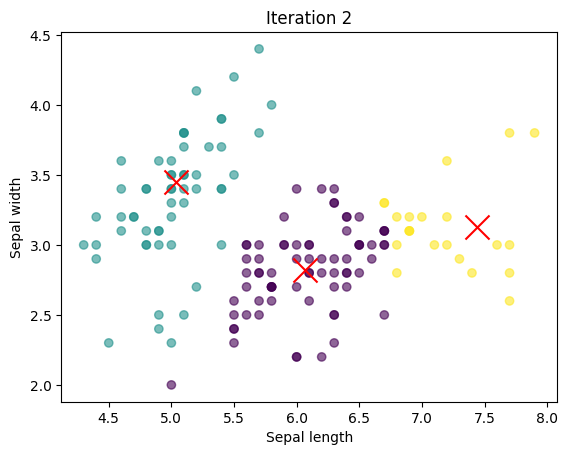

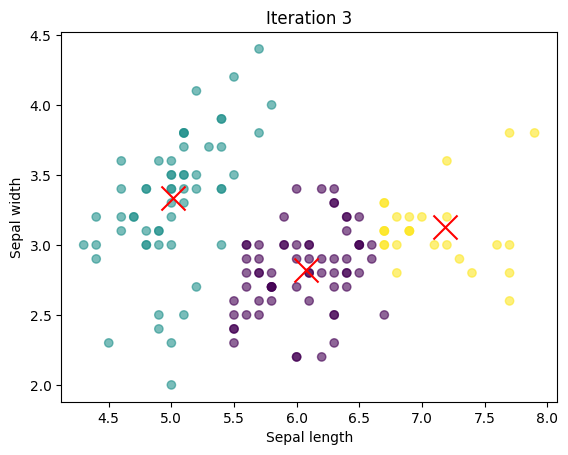

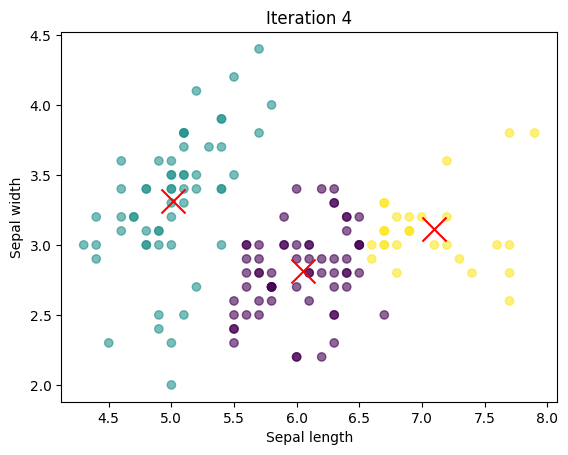

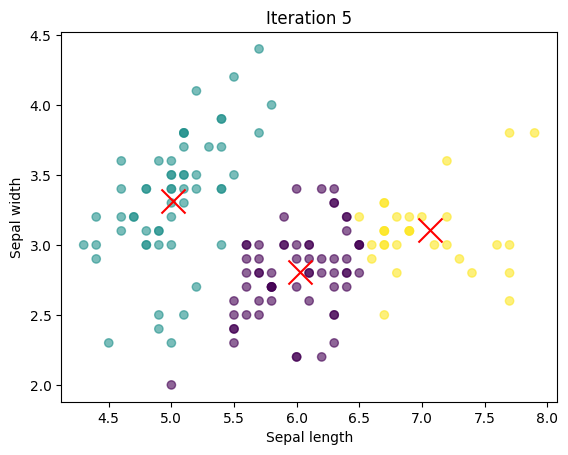

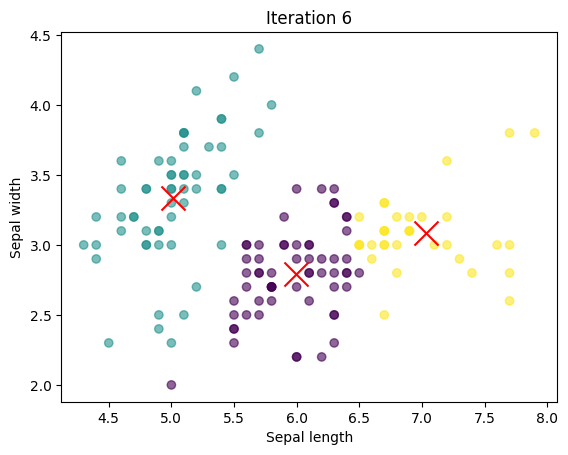

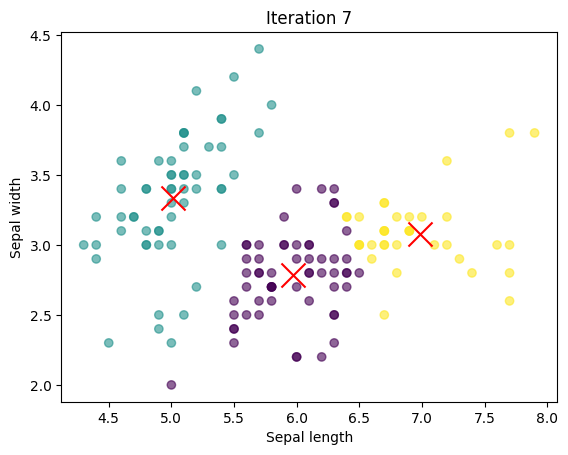

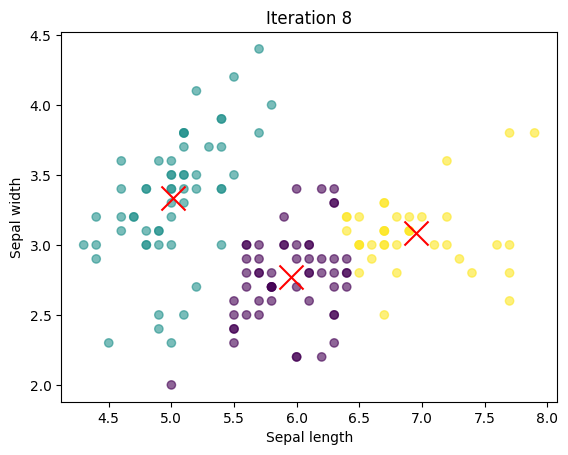

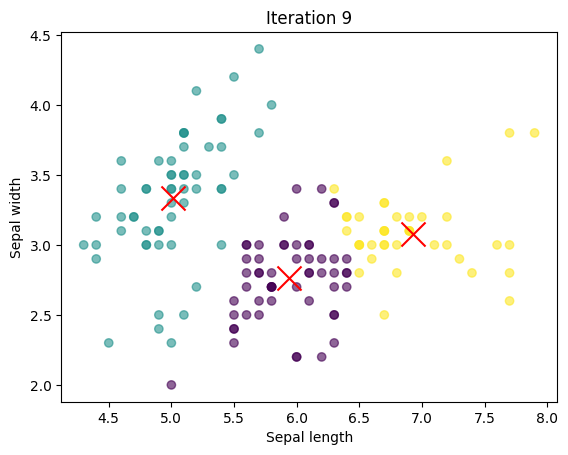

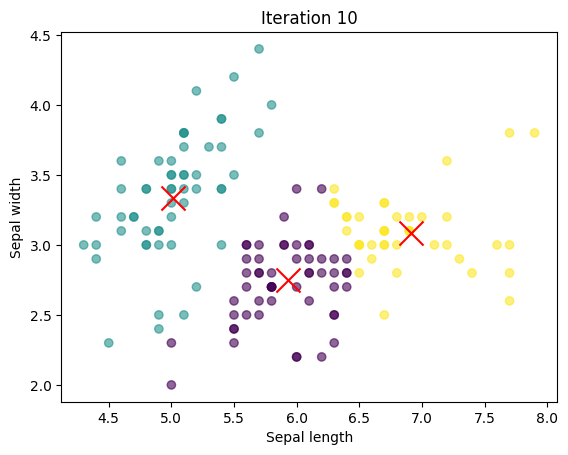

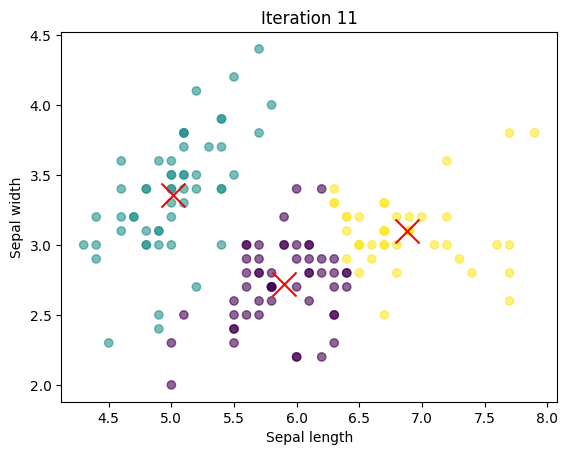

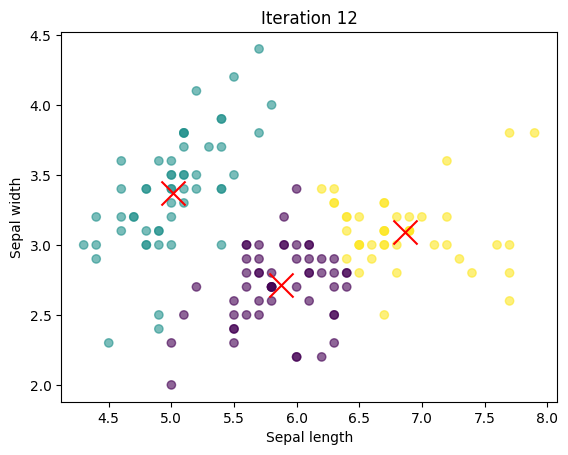

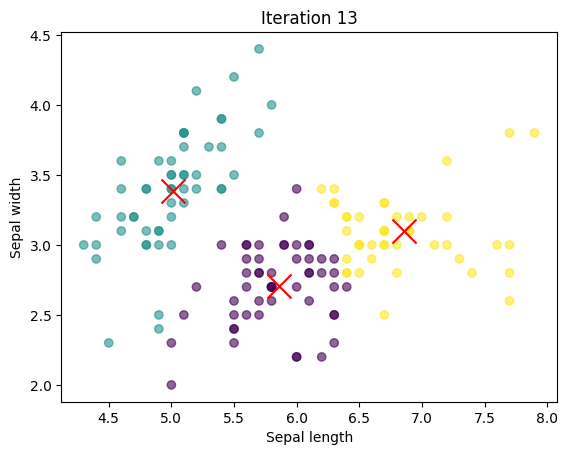

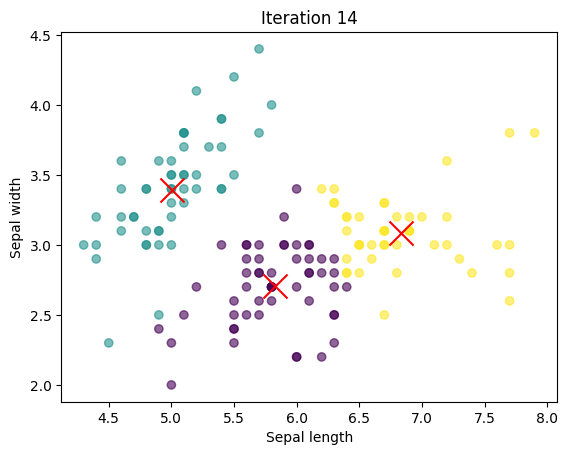

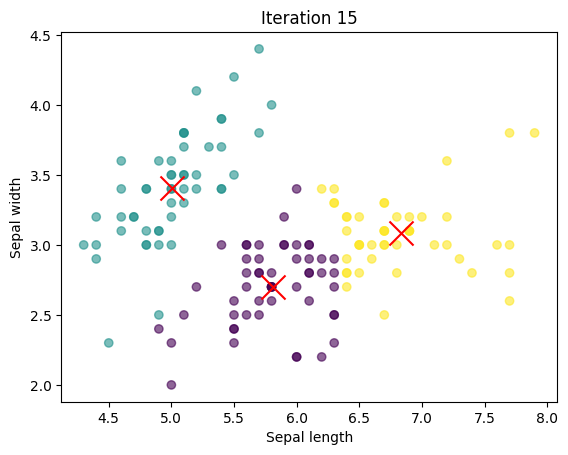

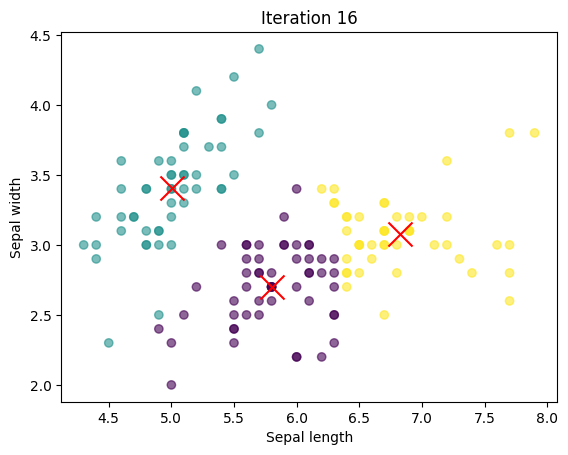

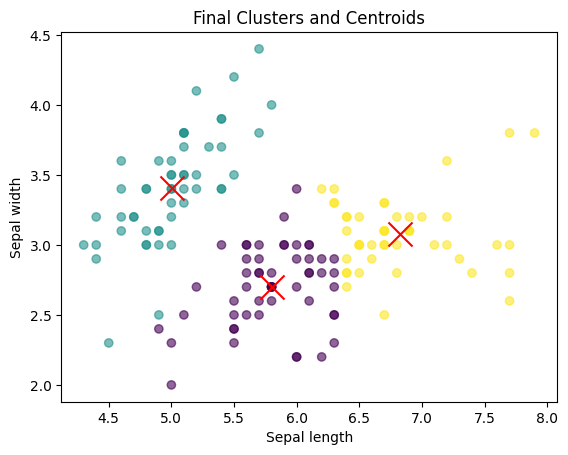

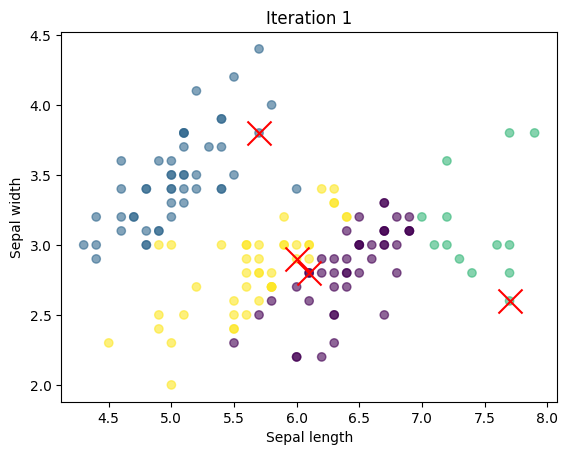

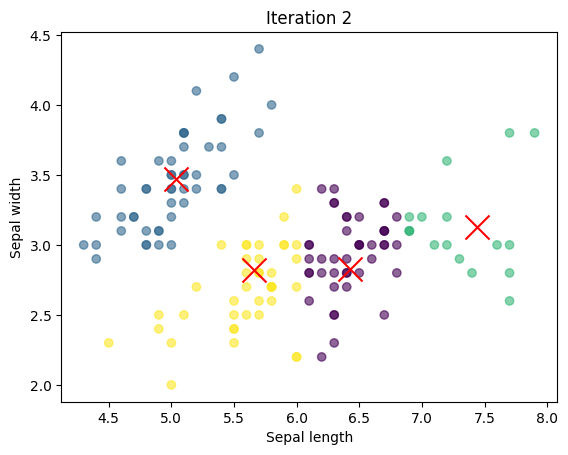

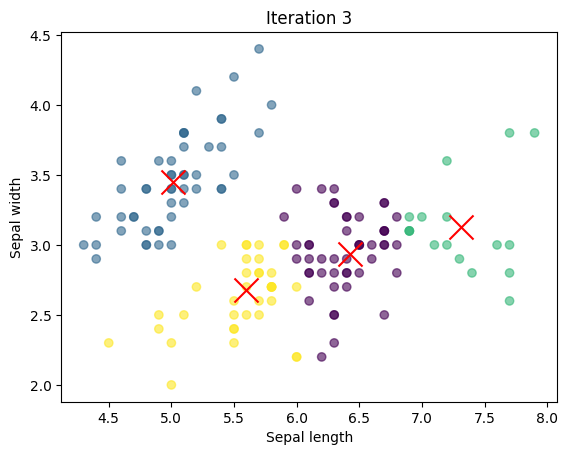

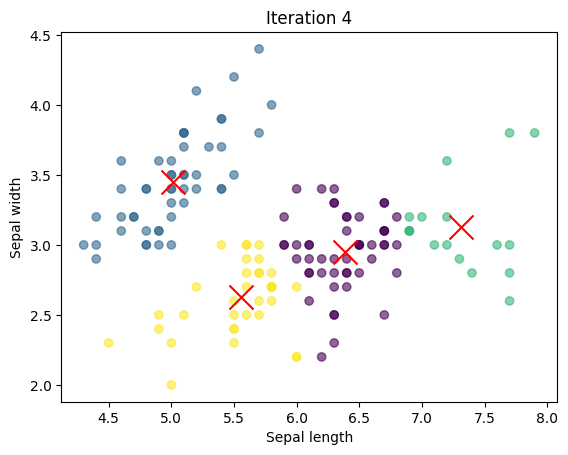

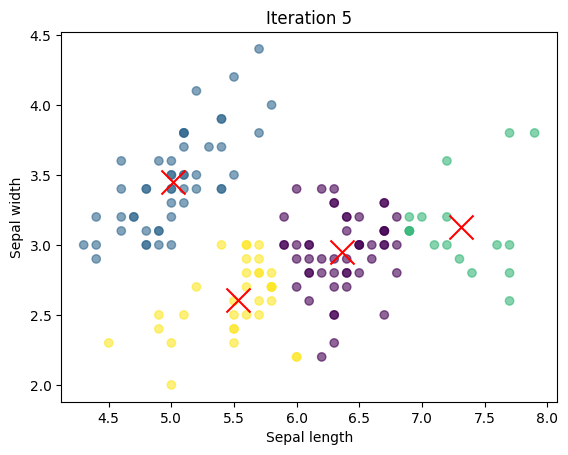

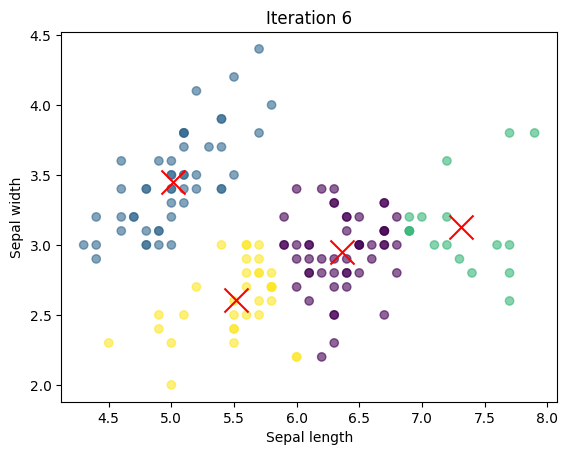

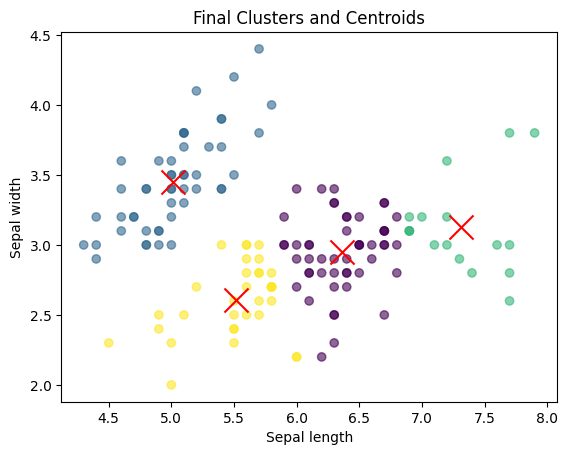

In [8]:
kmeans = KMeans(k=3)
kmeans.fit(data)
kmeans = KMeans(k=4)
kmeans.fit(data)

In [15]:
!pip install pandas

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.6 MB 12.2 MB/s eta 0:00:01
   ----------------- ---------------------- 5.0/11.6 MB 12.6 MB/s eta 0:00:01
   --------------------------- ------------ 7.9/11.6 MB 12.5 MB/s eta 0:00:01
   ------------------------------------ --- 10.5/11.6 MB 12.6 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 12.3 MB/s eta 0:00:00


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = {
    'Feature 1': [2.0, 3.0, 3.5, 8.0, 8.5, 9.0, 1.0, 1.5],
    'Feature 2': [3.0, 3.5, 3.0, 8.0, 8.5, 8.0, 2.0, 2.5],
    'Feature 3': [1.5, 2.0, 2.5, 7.5, 8.0, 8.5, 1.0, 1.5]
}

data = pd.DataFrame(data)

class KMeans:
    def __init__(self, k=3, max_iters=200):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.clusters = None

    def initialize_centroids(self, data):
        np.random.seed(42)
        indices = np.random.choice(data.shape[0], self.k, replace=False)
        self.centroids = data[indices]

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum(np.power(x1 - x2, 2)))

    def assign_clusters(self, data):
        distances = np.array([[self.euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])
        return np.argmin(distances, axis=1)
        
    def update_centroids(self, data):
        return np.array([data[self.clusters == i].mean(axis=0) for i in range(self.k)])
        
    def fit(self, data):
        data = data.to_numpy()
        self.initialize_centroids(data)
        for i in range(self.max_iters):
            self.clusters = self.assign_clusters(data)

            self.plot_clusters(data, i)

            new_centroids = self.update_centroids(data)

            if np.allclose(self.centroids, new_centroids):
                break
            
            self.centroids = new_centroids

        self.plot_final_clusters(data)

    def plot_clusters(self, data, iteration):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')  # Create 3D axes
        scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        ax.scatter(self.centroids[:, 0], self.centroids[:, 1], self.centroids[:, 2], s=300, c='red', marker='x')
        ax.set_title(f"Iteration {iteration + 1}")
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Feature 3')
        plt.legend(*scatter.legend_elements(), title="Clusters")
        plt.show()

    def plot_final_clusters(self, data):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        ax.scatter(self.centroids[:, 0], self.centroids[:, 1], self.centroids[:, 2], s=300, c='red', marker='x')
        ax.set_title("Final Clusters and Centroids")
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Feature 3')
        plt.legend(*scatter.legend_elements(), title="Clusters")
        plt.show()

#### Câu hỏi 8 Giả sử bạn khởi tạo 2 centroids cho bộ dữ liệu trên. Chọn hai điểm dữ liệu làm centroids ban đầu từ bảng trên.

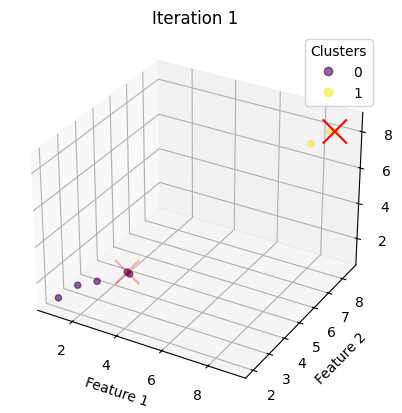

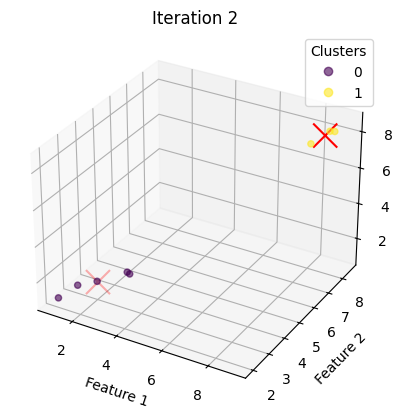

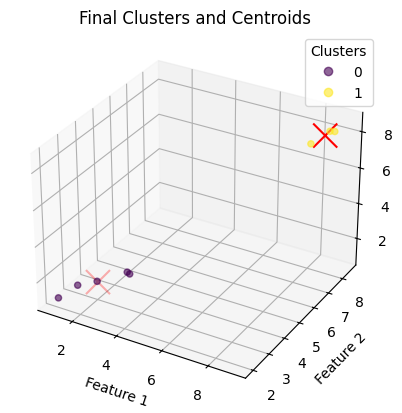

In [24]:
kmeans = KMeans(k=2)
kmeans.fit(data)

8: C, 9: D, 10: A, 11: A, 12: C, 13: B

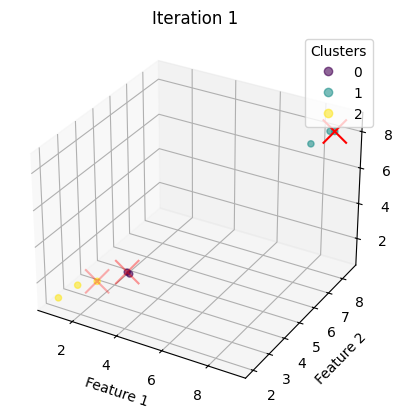

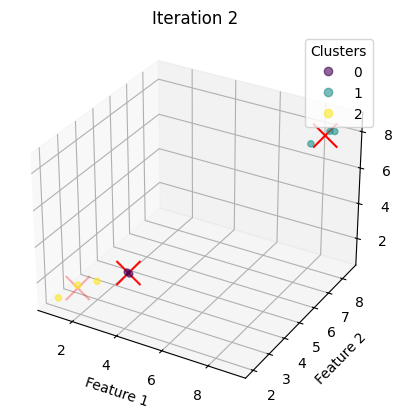

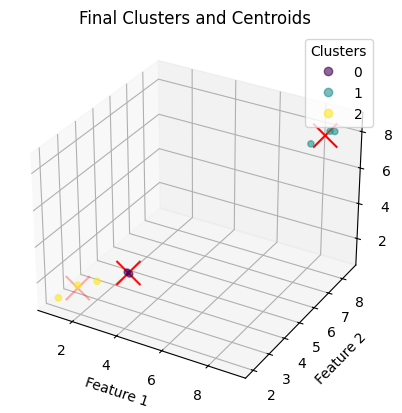

In [25]:
kmeans = KMeans(k=3)
kmeans.fit(data)